In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
train_dir = "C:/Users/Ravi Abhinav/Desktop/employee detect/train"
test_dir = "C:/Users/Ravi Abhinav/Desktop/employee detect/test"

In [3]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

Found 2400 images belonging to 6 classes.
Found 606 images belonging to 6 classes.


In [6]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='PReLU', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='PReLU'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='PReLU'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='PReLU'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(6, activation='softmax')
])


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

Epoch 1/50
38/38 [==============================] - 16s 373ms/step - loss: 0.7592 - accuracy: 0.7429 - val_loss: 4.6132 - val_accuracy: 0.1667
Epoch 2/50
38/38 [==============================] - 12s 305ms/step - loss: 0.1677 - accuracy: 0.9479 - val_loss: 7.1482 - val_accuracy: 0.1667
Epoch 3/50
38/38 [==============================] - 12s 311ms/step - loss: 0.0967 - accuracy: 0.9696 - val_loss: 7.7041 - val_accuracy: 0.2805
Epoch 4/50
38/38 [==============================] - 11s 301ms/step - loss: 0.0713 - accuracy: 0.9804 - val_loss: 9.6994 - val_accuracy: 0.1667
Epoch 5/50
38/38 [==============================] - 11s 300ms/step - loss: 0.0674 - accuracy: 0.9821 - val_loss: 11.3142 - val_accuracy: 0.1667
Epoch 6/50
38/38 [==============================] - 12s 304ms/step - loss: 0.0551 - accuracy: 0.9842 - val_loss: 14.3165 - val_accuracy: 0.1667
Epoch 7/50
38/38 [==============================] - 12s 311ms/step - loss: 0.0490 - accuracy: 0.9867 - val_loss: 13.2907 - val_accuracy: 0.1

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

10/10 [==============================] - 1s 107ms/step - loss: 5.6625e-04 - accuracy: 1.0000
Test Accuracy: 100.00%


In [18]:
label_dict = {0:'abhi',1:'ajay',2:'mili',3:'naveen',4:'vamshi',5:'vidya'}


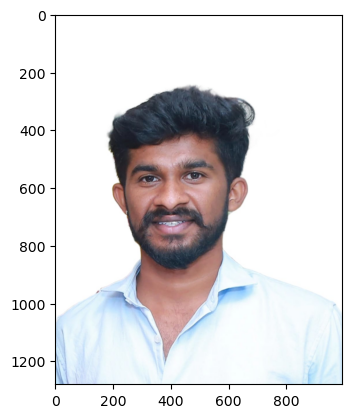

In [19]:
image_path = "C:/Users/Ravi Abhinav/Documents/img recog/ajay.jpg"
import matplotlib.pyplot as plt
imge = plt.imread(image_path)
plt.imshow(imge)
plt.show()

In [20]:
# Predict on a new image
def predict_identify(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    prediction = model.predict(img)
    return np.argmax(prediction)

identify = predict_identify(image_path)
print(f'Predicted person index: {identify}')
print(f'Predicted person name: {label_dict[identify]}')

1/1 [==============================] - 0s 161ms/step
Predicted person index: 2
Predicted person name: mili


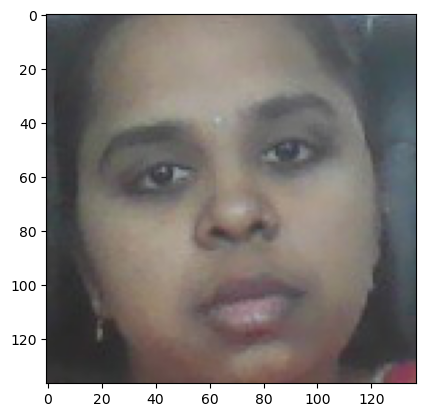

1/1 [==============================] - 0s 25ms/step
Predicted person index: 5
Predicted person name: vidya


In [33]:
image_path = "C:/Users/Ravi Abhinav/Desktop/employee detect/test/vidya/414.jpg"
import matplotlib.pyplot as plt
imge = plt.imread(image_path)
plt.imshow(imge)
plt.show()

identify = predict_identify(image_path)
print(f'Predicted person index: {identify}')
print(f'Predicted person name: {label_dict[identify]}')

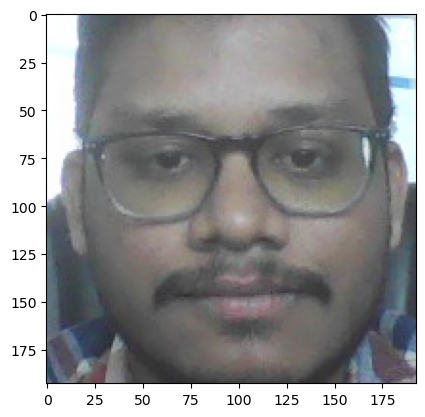

1/1 [==============================] - 0s 24ms/step
Predicted person index: 4
Predicted person name: vamshi


In [32]:
image_path1 = "C:/Users/Ravi Abhinav/Desktop/employee detect/test/vamshi/412.jpg"
import matplotlib.pyplot as plt
imge = plt.imread(image_path1)
plt.imshow(imge)
plt.show()

identify = predict_identify(image_path1)
print(f'Predicted person index: {identify}')
print(f'Predicted person name: {label_dict[identify]}')

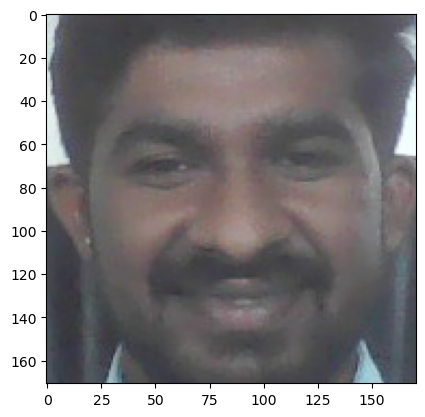

1/1 [==============================] - 0s 26ms/step
Predicted person index: 1
Predicted person name: ajay


In [31]:
# On train data

image_path = "C:/Users/Ravi Abhinav/Desktop/employee detect/test/ajay/410.jpg"
import matplotlib.pyplot as plt
imge = plt.imread(image_path)
plt.imshow(imge)
plt.show()

identify = predict_identify(image_path)
print(f'Predicted person index: {identify}')
print(f'Predicted person name: {label_dict[identify]}')

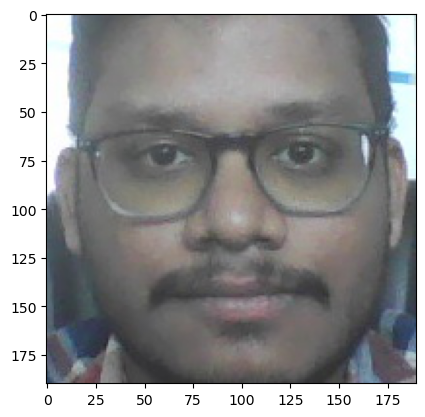

1/1 [==============================] - 0s 26ms/step
Predicted person index: 4
Predicted person name: vamshi


In [29]:
# On train data

image_path = "C:/Users/Ravi Abhinav/Desktop/employee detect/test/vamshi/410.jpg"
import matplotlib.pyplot as plt
imge = plt.imread(image_path)
plt.imshow(imge)
plt.show()

identify = predict_identify(image_path)
print(f'Predicted person index: {identify}')
print(f'Predicted person name: {label_dict[identify]}')

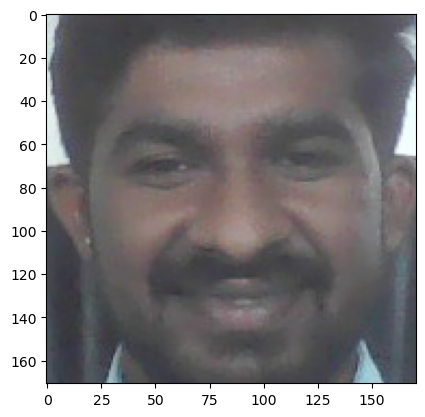

1/1 [==============================] - 0s 23ms/step
Predicted person index: 1
Predicted person name: ajay


In [35]:
# On test data
# On test data

image_path = "C:/Users/Ravi Abhinav/Desktop/employee detect/test/ajay/410.jpg"
import matplotlib.pyplot as plt
imge = plt.imread(image_path)
plt.imshow(imge)
plt.show()

identify = predict_identify(image_path)
print(f'Predicted person index: {identify}')
print(f'Predicted person name: {label_dict[identify]}')

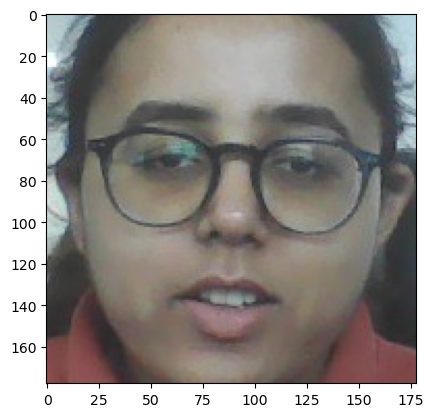

1/1 [==============================] - 0s 25ms/step
Predicted person index: 2
Predicted person name: mili


In [30]:
# On test data

image_path = "C:/Users/Ravi Abhinav/Desktop/employee detect/test/mili/410.jpg"
import matplotlib.pyplot as plt
imge = plt.imread(image_path)
plt.imshow(imge)
plt.show()

identify = predict_identify(image_path)
print(f'Predicted person index: {identify}')
print(f'Predicted person name: {label_dict[identify]}')

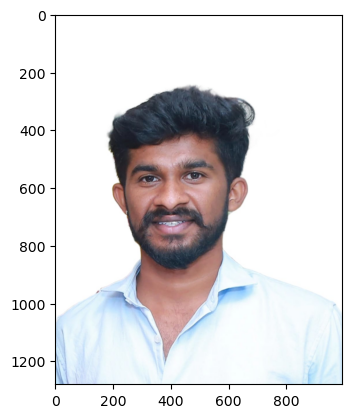

1/1 [==============================] - 0s 23ms/step
Predicted person index: 2
Predicted person name: mili


In [34]:
image_path = "C:/Users/Ravi Abhinav/Documents/img recog/ajay.jpg"
import matplotlib.pyplot as plt
imge = plt.imread(image_path)
plt.imshow(imge)
plt.show()

identify = predict_identify(image_path)
print(f'Predicted person index: {identify}')
print(f'Predicted person name: {label_dict[identify]}')

In [39]:
model.save('C:/Users/Ravi Abhinav/Desktop/employee_identify_model.h5')
